# NEWS CATEGORIZER

#Normalization

In [1]:
import numpy as np
import pandas as pd
import json
import matplotlib.pyplot as plt
import matplotlib

from categorizer import Normalizer
from categorizer import Analyzer
from categorizer import Vectorizer

#Import json data into DF
#dataset: https://www.kaggle.com/rmisra/news-category-dataset
src = 'News_Category_Dataset_v2.json'
normalizer = Normalizer(src,5000)



normalizer.load_file_json()



normalizer.data.head(100)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\przek\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\przek\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


,category,headline,authors,link,short_description,date
0,TRAVEL,Wandering Between Sacred Foxes and Abraham,"Stefan Szepesi, Contributor\nWalker, guidebook...",https://www.huffingtonpost.com/entry/wandering...,Rings of huge T-shaped pillars up to six meter...,2013-12-15
1,POLITICS,Canada Is Using An Olympic Stadium To House In...,Elyse Wanshel,https://www.huffingtonpost.com/entry/canada-st...,Many are Haitians displaced by the 2010 earthq...,2017-08-03
2,CRIME,Town Mayor's Son Shot Dead In Christmas Home I...,,https://www.huffingtonpost.com/entry/joshua-sl...,"Just before midnight on Christmas Eve, Gareth ...",2013-12-26
3,PARENTING,We Are All Messing Our Kids Up Together and It...,"Brenna Jennings, Contributor\nBlogger, Suburba...",https://www.huffingtonpost.com/entry/we-are-al...,I don't have to please my daughter all the tim...,2013-09-29
4,STYLE & BEAUTY,Rose Byrne In Pringle Of Scotland: Look Of The...,Brooke Bobb,https://www.huffingtonpost.com/entry/rose-byrn...,WHAT: The gorgeous Aussie actress sported a cu...,2012-02-22
...,...,...,...,...,...,...
95,WORLDPOST,These Are The World's 5 Most Wanted ISIS Jihad...,,https://www.huffingtonpost.com/entry/isis-most...,,2015-06-27
96,HEALTHY LIVING,8 Steps to Get Your Mojo Back Before Summer,"Sherrie Campbell, PhD, ContributorVeteran, lic...",https://www.huffingtonpost.com/entry/8-steps-t...,Most of you are great starters but not all are...,2015-05-05
97,RELIGION,Two Robins Wish You a Very Happy Christmas,"Robin Koerner, ContributorPublisher, WatchingA...",https://www.huffingtonpost.com/entry/two-robin...,,2014-12-27
98,POLITICS,"Texas, 12 Other States Push To Block Feds From...",Cristian Farias,https://www.huffingtonpost.com/entry/texas-tra...,They claim the Obama administration is misread...,2016-07-07


In [2]:
normalizer.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   category           5000 non-null   object
 1   headline           5000 non-null   object
 2   authors            5000 non-null   object
 3   link               5000 non-null   object
 4   short_description  5000 non-null   object
 5   date               5000 non-null   object
dtypes: object(6)
memory usage: 234.5+ KB
None


In [3]:
#normalizer.concat_cols('text',['headline','short_description'])
normalizer.concat_cols('text',['headline','authors'])
#normalizer.save_col('text','authors')


normalizer.data.head(100)





,category,headline,authors,link,short_description,date,text
0,TRAVEL,Wandering Between Sacred Foxes and Abraham,"Stefan Szepesi, Contributor\nWalker, guidebook...",https://www.huffingtonpost.com/entry/wandering...,Rings of huge T-shaped pillars up to six meter...,2013-12-15,Wandering Between Sacred Foxes and Abraham Ste...
1,POLITICS,Canada Is Using An Olympic Stadium To House In...,Elyse Wanshel,https://www.huffingtonpost.com/entry/canada-st...,Many are Haitians displaced by the 2010 earthq...,2017-08-03,Canada Is Using An Olympic Stadium To House In...
2,CRIME,Town Mayor's Son Shot Dead In Christmas Home I...,,https://www.huffingtonpost.com/entry/joshua-sl...,"Just before midnight on Christmas Eve, Gareth ...",2013-12-26,Town Mayor's Son Shot Dead In Christmas Home I...
3,PARENTING,We Are All Messing Our Kids Up Together and It...,"Brenna Jennings, Contributor\nBlogger, Suburba...",https://www.huffingtonpost.com/entry/we-are-al...,I don't have to please my daughter all the tim...,2013-09-29,We Are All Messing Our Kids Up Together and It...
4,STYLE & BEAUTY,Rose Byrne In Pringle Of Scotland: Look Of The...,Brooke Bobb,https://www.huffingtonpost.com/entry/rose-byrn...,WHAT: The gorgeous Aussie actress sported a cu...,2012-02-22,Rose Byrne In Pringle Of Scotland: Look Of The...
...,...,...,...,...,...,...,...
95,WORLDPOST,These Are The World's 5 Most Wanted ISIS Jihad...,,https://www.huffingtonpost.com/entry/isis-most...,,2015-06-27,These Are The World's 5 Most Wanted ISIS Jihad...
96,HEALTHY LIVING,8 Steps to Get Your Mojo Back Before Summer,"Sherrie Campbell, PhD, ContributorVeteran, lic...",https://www.huffingtonpost.com/entry/8-steps-t...,Most of you are great starters but not all are...,2015-05-05,8 Steps to Get Your Mojo Back Before Summer Sh...
97,RELIGION,Two Robins Wish You a Very Happy Christmas,"Robin Koerner, ContributorPublisher, WatchingA...",https://www.huffingtonpost.com/entry/two-robin...,,2014-12-27,Two Robins Wish You a Very Happy Christmas Rob...
98,POLITICS,"Texas, 12 Other States Push To Block Feds From...",Cristian Farias,https://www.huffingtonpost.com/entry/texas-tra...,They claim the Obama administration is misread...,2016-07-07,"Texas, 12 Other States Push To Block Feds From..."


In [4]:
normalizer.drop_cols(['date', 'link', 'short_description', 'headline', 'authors'])
normalizer.data.head(100)

,category,text
0,TRAVEL,Wandering Between Sacred Foxes and Abraham Ste...
1,POLITICS,Canada Is Using An Olympic Stadium To House In...
2,CRIME,Town Mayor's Son Shot Dead In Christmas Home I...
3,PARENTING,We Are All Messing Our Kids Up Together and It...
4,STYLE & BEAUTY,Rose Byrne In Pringle Of Scotland: Look Of The...
...,...,...
95,WORLDPOST,These Are The World's 5 Most Wanted ISIS Jihad...
96,HEALTHY LIVING,8 Steps to Get Your Mojo Back Before Summer Sh...
97,RELIGION,Two Robins Wish You a Very Happy Christmas Rob...
98,POLITICS,"Texas, 12 Other States Push To Block Feds From..."


In [5]:
normalizer.drop_stopwords(['text'])

normalizer.data.head(100)






,category,text
0,TRAVEL,"Wandering Sacred Foxes Abraham Stefan Szepesi,..."
1,POLITICS,Canada Using Olympic Stadium House Influx U.S....
2,CRIME,Town Mayor's Son Shot Dead Christmas Home Inva...
3,PARENTING,"Messing Kids Together OK Brenna Jennings, Cont..."
4,STYLE & BEAUTY,Rose Byrne Pringle Scotland: Look Day (PHOTOS)...
...,...,...
95,WORLDPOST,World's 5 Wanted ISIS Jihadists
96,HEALTHY LIVING,"8 Steps Get Mojo Back Summer Sherrie Campbell,..."
97,RELIGION,"Two Robins Wish Happy Christmas Robin Koerner,..."
98,POLITICS,"Texas, 12 States Push Block Feds Enforcing Tra..."


In [6]:
normalizer.to_lower(['text','category'])
normalizer.data.head(100)

,category,text
0,travel,"wandering sacred foxes abraham stefan szepesi,..."
1,politics,canada using olympic stadium house influx u.s....
2,crime,town mayor's son shot dead christmas home inva...
3,parenting,"messing kids together ok brenna jennings, cont..."
4,style & beauty,rose byrne pringle scotland: look day (photos)...
...,...,...
95,worldpost,world's 5 wanted isis jihadists
96,healthy living,"8 steps get mojo back summer sherrie campbell,..."
97,religion,"two robins wish happy christmas robin koerner,..."
98,politics,"texas, 12 states push block feds enforcing tra..."


In [7]:
normalizer.drop_num(['text'])
normalizer.data.head(100)

,category,text
0,travel,"wandering sacred foxes abraham stefan szepesi,..."
1,politics,canada using olympic stadium house influx u.s....
2,crime,town mayor's son shot dead christmas home inva...
3,parenting,"messing kids together ok brenna jennings, cont..."
4,style & beauty,rose byrne pringle scotland: look day (photos)...
...,...,...
95,worldpost,world's wanted isis jihadists
96,healthy living,"steps get mojo back summer sherrie campbell, p..."
97,religion,"two robins wish happy christmas robin koerner,..."
98,politics,"texas, states push block feds enforcing trans ..."


In [8]:
normalizer.drop_spec(['text'])
normalizer.data.head(100)

c:\Users\przek\source\repos\uczelnia\news_category_predictor\categorizer\normalizer.py:60: FutureWarning: The default value of regex will change from True to False in a future version.
  self.data[c] = self.data[c].str.replace('[^\w\s]', '')


,category,text
0,travel,wandering sacred foxes abraham stefan szepesi ...
1,politics,canada using olympic stadium house influx us a...
2,crime,town mayors son shot dead christmas home invasion
3,parenting,messing kids together ok brenna jennings contr...
4,style & beauty,rose byrne pringle scotland look day photos br...
...,...,...
95,worldpost,worlds wanted isis jihadists
96,healthy living,steps get mojo back summer sherrie campbell ph...
97,religion,two robins wish happy christmas robin koerner ...
98,politics,texas states push block feds enforcing trans b...


In [9]:
normalizer.drop_rarest(2)
normalizer.data.head(100)

,category,text
0,travel,sacred abraham contributor walker author
1,politics,canada using olympic house us elyse wanshel
2,crime,town mayors son shot dead christmas home
3,parenting,messing kids together ok brenna jennings contr...
4,style & beauty,rose pringle scotland look day photos brooke bobb
...,...,...
95,worldpost,worlds wanted isis
96,healthy living,steps get back summer sherrie campbell phd con...
97,religion,two wish happy christmas robin contributorpubl...
98,politics,texas states push block feds trans bathroom gu...


In [10]:
normalizer.lemmatize()
#normalizer.data.head(100)

In [11]:
vectorizer = Vectorizer(normalizer.data)

#Visualization

In [12]:
analyzer = Analyzer(normalizer.data.copy())
normalizer.drop_cols(['category'])

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\przek\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\przek\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


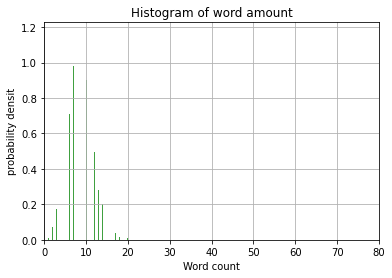

In [13]:
analyzer.word_count('text', 80)

c:\Users\przek\source\repos\uczelnia\news_category_predictor\categorizer\analyzer.py:43: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  unique_category['Word_count'][a] = unique_category['Word_count'][a] + self.data['word_count'][index]
c:\Users\przek\source\repos\uczelnia\news_category_predictor\categorizer\analyzer.py:44: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  unique_category['Amount_of_cat'][a] = unique_category['Amount_of_cat'][a]+1
c:\Users\przek\source\repos\uczelnia\news_category_predictor\categorizer\analyzer.py:48: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

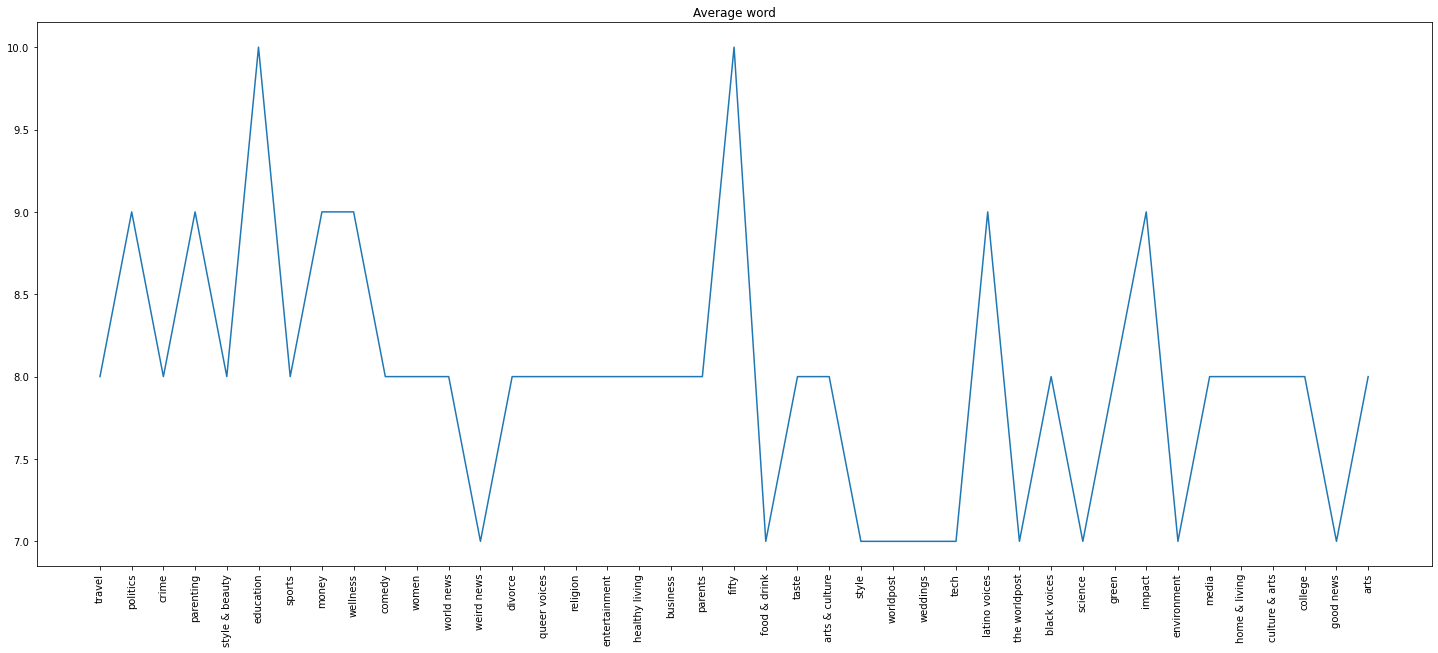

In [14]:
analyzer.word_avg()

c:\Users\przek\source\repos\uczelnia\news_category_predictor\categorizer\analyzer.py:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  unique_category['Unique_words'][a] = unique_category['Unique_words'][a] + len(unique_text_words)
c:\Users\przek\source\repos\uczelnia\news_category_predictor\categorizer\analyzer.py:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  unique_category['Amount_of_cat'][a] = unique_category['Amount_of_cat'][a]+1
c:\Users\przek\source\repos\uczelnia\news_category_predictor\categorizer\analyzer.py:73: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

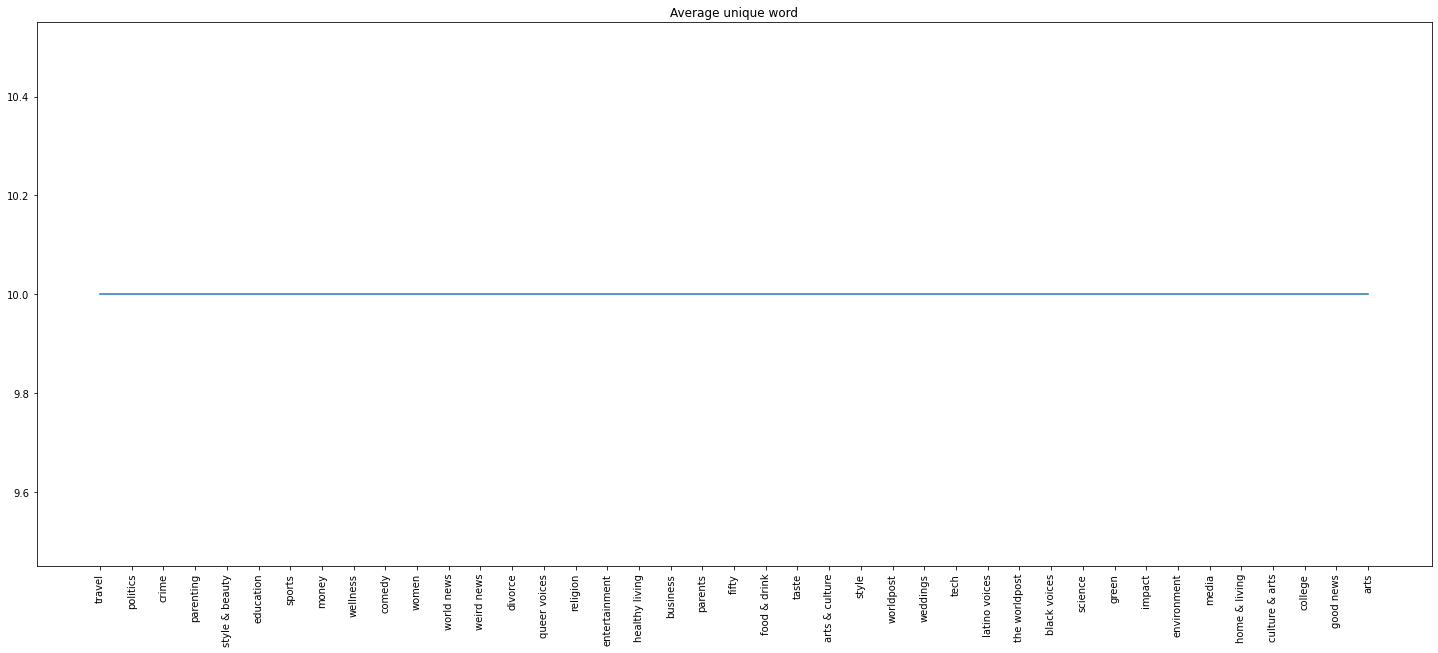

In [15]:

analyzer.word_unique()

c:\Users\przek\source\repos\uczelnia\news_category_predictor\categorizer\analyzer.py:93: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  unique_category['Amount_of_cat'][a] = unique_category['Amount_of_cat'][a]+1


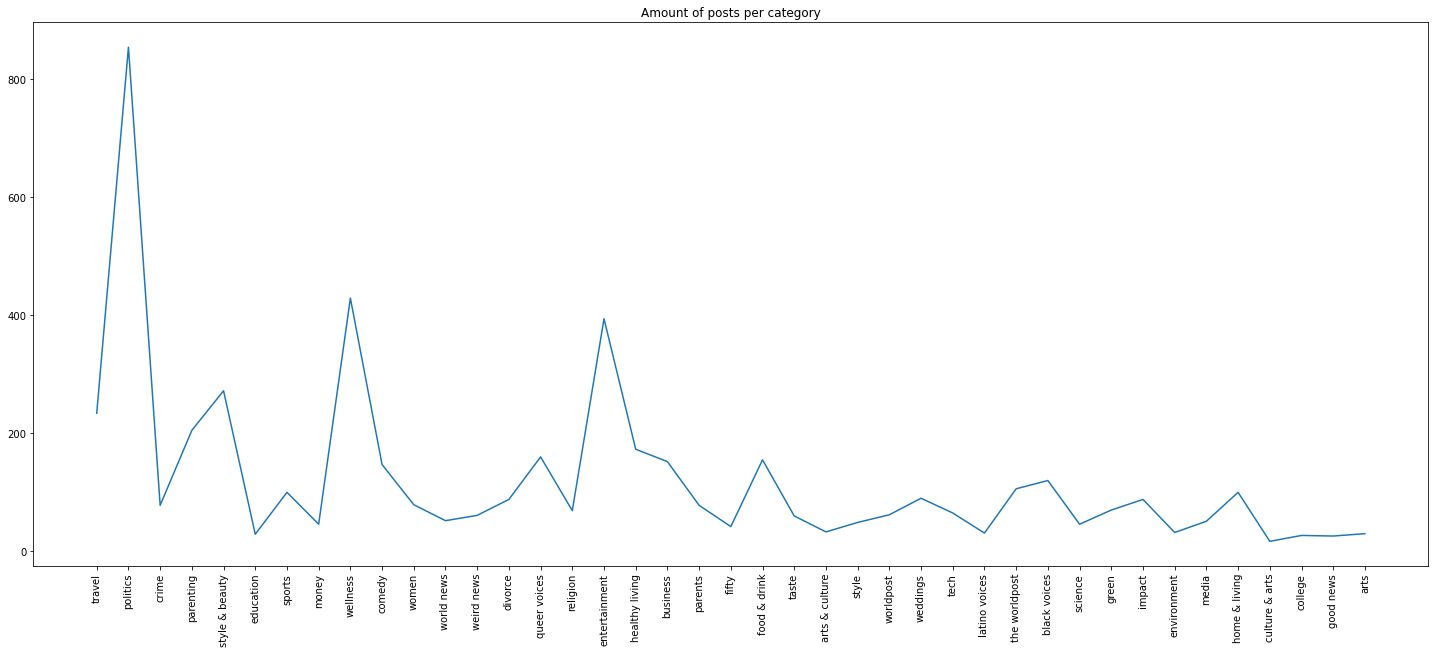

In [16]:
analyzer.amount_of_cat()

In [17]:
from sklearn import model_selection, preprocessing, linear_model, naive_bayes, metrics, svm
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn import decomposition, ensemble
train_x, valid_x, train_y, valid_y = model_selection.train_test_split(vectorizer.data['text'], vectorizer.data['category'])


In [18]:
def train_model(classifier, feature_vector_train, label, feature_vector_valid, is_neural_net=False):
    # fit the training dataset on the classifier
    classifier.fit(feature_vector_train, label)
    
    # predict the labels on validation dataset
    predictions = classifier.predict(feature_vector_valid)
    
    if is_neural_net:
        predictions = predictions.argmax(axis=-1)
    
    return metrics.accuracy_score(predictions, valid_y)

In [19]:


count_vect = CountVectorizer(max_features=5000, ngram_range=(1,2),analyzer = "word", token_pattern=r'\w{1,}')
count_vect.fit(vectorizer.data['text'])

# transform the training and validation data using count vectorizer object
xtrain_count =  count_vect.transform(train_x)
xvalid_count =  count_vect.transform(valid_x)
print(xtrain_count)

  (0, 432)	1
  (0, 435)	1
  (0, 1138)	1
  (0, 1381)	1
  (0, 2702)	1
  (0, 3367)	1
  (0, 3863)	1
  (0, 3864)	1
  (0, 3978)	1
  (0, 4408)	1
  (0, 4794)	1
  (1, 569)	1
  (1, 807)	1
  (1, 808)	1
  (1, 1417)	1
  (1, 2177)	1
  (1, 2362)	1
  (1, 2839)	1
  (1, 2995)	1
  (1, 2996)	1
  (1, 3155)	1
  (1, 3167)	1
  (1, 3433)	1
  (1, 3444)	1
  (1, 4088)	1
  :	:
  (3745, 3916)	1
  (3746, 817)	1
  (3746, 1089)	1
  (3746, 1095)	1
  (3746, 2261)	1
  (3746, 3548)	1
  (3746, 3627)	1
  (3747, 177)	1
  (3747, 1065)	1
  (3747, 2439)	1
  (3747, 2553)	1
  (3747, 3245)	1
  (3747, 3354)	1
  (3747, 4676)	1
  (3747, 4718)	1
  (3748, 669)	1
  (3748, 1308)	1
  (3748, 1978)	1
  (3748, 2159)	1
  (3748, 3983)	1
  (3748, 4378)	1
  (3748, 4611)	1
  (3749, 558)	1
  (3749, 1213)	1
  (3749, 3958)	1


In [20]:
# 2-3 ngram level tf-idf 
tfidf_vect_ngram = TfidfVectorizer(analyzer='word', token_pattern=r'\w{1,}', ngram_range=(2,3), max_features=5000)
tfidf_vect_ngram.fit(vectorizer.data['text'])
xtrain_tfidf_ngram =  tfidf_vect_ngram.transform(train_x)
xvalid_tfidf_ngram =  tfidf_vect_ngram.transform(valid_x)
print(xtrain_tfidf_ngram )


  (0, 3986)	0.5732582567235621
  (0, 415)	0.8193747439958488
  (1, 4970)	0.4103112439408962
  (1, 3434)	0.36222680967376364
  (1, 3433)	0.3351856493778133
  (1, 3176)	0.4103112439408962
  (1, 3175)	0.32794936136777636
  (1, 2993)	0.34353933081742544
  (1, 760)	0.4406377532124006
  (2, 3270)	0.6846480282238215
  (2, 3198)	0.7288738419296122
  (4, 3231)	0.46726373853647907
  (4, 2505)	0.43891161795923755
  (4, 931)	0.46726373853647907
  (4, 930)	0.3903208776982639
  (4, 781)	0.46726373853647907
  (5, 2051)	0.48958607296496326
  (5, 1734)	0.41402752562542405
  (5, 965)	0.4403122840546804
  (5, 964)	0.41402752562542405
  (5, 232)	0.4728561998306396
  (6, 3924)	1.0
  (7, 2864)	1.0
  (8, 3435)	0.5000712597601047
  (8, 3433)	0.4398209760044797
  :	:
  (3733, 1205)	0.31622776601683794
  (3733, 1204)	0.31622776601683794
  (3734, 763)	1.0
  (3736, 3163)	0.7635689922600614
  (3736, 751)	0.6457262531901228
  (3739, 4740)	0.486725969568648
  (3739, 4600)	0.5181667262327075
  (3739, 4599)	0.51816672

In [21]:
# 1-3 ngram level tf-idf 

tfidf_vect_ngram = TfidfVectorizer(analyzer='word', token_pattern=r'\w{1,}', ngram_range=(1,3), max_features=5000)
tfidf_vect_ngram.fit(vectorizer.data['text'])
xtrain_tfidf_ngram13 =  tfidf_vect_ngram.transform(train_x)
xvalid_tfidf_ngram13 =  tfidf_vect_ngram.transform(valid_x)
print(xtrain_tfidf_ngram13 )

  (0, 4796)	0.24726716083472786
  (0, 4399)	0.34055295721688633
  (0, 3989)	0.3223465942905385
  (0, 3882)	0.29474132683119514
  (0, 3881)	0.29253626011014366
  (0, 2737)	0.3168877345249461
  (0, 1400)	0.29474132683119514
  (0, 1189)	0.33789538764038357
  (0, 430)	0.4212823738424856
  (0, 426)	0.25996726120387387
  (1, 4975)	0.28382293876806075
  (1, 4974)	0.22685108654716463
  (1, 4102)	0.1911232142760555
  (1, 3481)	0.25056168735409007
  (1, 3480)	0.23185661481164627
  (1, 3462)	0.13961126896091852
  (1, 3197)	0.28382293876806075
  (1, 3196)	0.22685108654716463
  (1, 3182)	0.15441256276703852
  (1, 3014)	0.2376350731179569
  (1, 3013)	0.19593568230813616
  (1, 2861)	0.2376350731179569
  (1, 2401)	0.24089676236040905
  (1, 2221)	0.20520997039909084
  (1, 1438)	0.25525352526137013
  :	:
  (3745, 1268)	0.4030420307702858
  (3745, 359)	0.41124771555603906
  (3746, 3645)	0.4447821861352539
  (3746, 3564)	0.4043849210295878
  (3746, 2289)	0.5079807531409343
  (3746, 1151)	0.396042705669045

In [22]:
encoder = preprocessing.LabelEncoder()
train_y = encoder.fit_transform(train_y)
valid_y = encoder.fit_transform(valid_y)

results=[]

accuracy = train_model(naive_bayes.MultinomialNB(), xtrain_count, train_y, xvalid_count)
results.append("NB, Count Vectors: "+ str(accuracy))

In [23]:
accuracy = train_model(naive_bayes.MultinomialNB(), xtrain_tfidf_ngram, train_y, xvalid_tfidf_ngram)
results.append("NB, 2-3-Gram Vectors TF-IDF: " + str(accuracy))

In [24]:
accuracy = train_model(naive_bayes.MultinomialNB(), xtrain_tfidf_ngram13, train_y, xvalid_tfidf_ngram13)
results.append("NB, 1-3-Gram Vectors TF-IDF: " + str(accuracy))

In [25]:
accuracy = train_model(linear_model.LogisticRegression(), xtrain_count, train_y, xvalid_count)
results.append("LR, Count Vectors: " + str(accuracy))

In [26]:
accuracy = train_model(linear_model.LogisticRegression(), xtrain_tfidf_ngram, train_y, xvalid_tfidf_ngram)
results.append("LR, 2-3-Gram Vectors: " + str(accuracy))

In [27]:
accuracy = train_model(linear_model.LogisticRegression(), xtrain_tfidf_ngram13, train_y, xvalid_tfidf_ngram13)
results.append("LR, 1-3-Gram Vectors: " + str(accuracy))

In [28]:
accuracy = train_model(ensemble.RandomForestClassifier(), xtrain_count, train_y, xvalid_count)
results.append("RF, Count Vectors: " + str(accuracy))

In [29]:
results

['NB, Count Vectors: 0.5248',
 'NB, 2-3-Gram Vectors TF-IDF: 0.32',
 'NB, 1-3-Gram Vectors TF-IDF: 0.3816',
 'LR, Count Vectors: 0.5312',
 'LR, 2-3-Gram Vectors: 0.3784',
 'LR, 1-3-Gram Vectors: 0.4592',
 'RF, Count Vectors: 0.5032']

Szacowanie kategorii na podstawie treści, obserwacje:

    1
        CLASSIFIER: NAIVE BAYES, LINEAR, RANDOM FORREST
        
        Dane wejściowe: dataset: 5000  drop_rare: >= 1
        concat_cols =  [headline, short_description]

        ['NB, Count Vectors: 0.4328',
         'NB, 2-3-Gram Vectors TF-IDF: 0.2104',
         'NB, 1-3-Gram Vectors TF-IDF: 0.2984',
         'LR, Count Vectors: 0.4424',
         'LR, 2-3-Gram Vectors: 0.2304',
         'LR, 1-3-Gram Vectors: 0.396',
         'RF, Count Vectors: 0.4304']

        concat_cols =  [headline, authors]

         ['NB, Count Vectors: 0.5336',
          'NB, 2-3-Gram Vectors TF-IDF: 0.332',
          'NB, 1-3-Gram Vectors TF-IDF: 0.3792',
          'LR, Count Vectors: 0.5496',
          'LR, 2-3-Gram Vectors: 0.3784',
          'LR, 1-3-Gram Vectors: 0.4464',
          'RF, Count Vectors: 0.5048']

        concat_cols =  ['short_description','authors']

        ['NB, Count Vectors: 0.4752',
        'NB, 2-3-Gram Vectors TF-IDF: 0.3096',
        'NB, 1-3-Gram Vectors TF-IDF: 0.3576',
        'LR, Count Vectors: 0.492',
        'LR, 2-3-Gram Vectors: 0.3792',
        'LR, 1-3-Gram Vectors: 0.4272',
        'RF, Count Vectors: 0.4768']

        save_col =  authors

        ['NB, Count Vectors: 0.4384',
         'NB, 2-3-Gram Vectors TF-IDF: 0.3072',
         'NB, 1-3-Gram Vectors TF-IDF: 0.3504',
         'LR, Count Vectors: 0.4384',
         'LR, 2-3-Gram Vectors: 0.364',
         'LR, 1-3-Gram Vectors: 0.3928',
         'RF, Count Vectors: 0.4416']
         

         concat_cols =  [headline, short_description]
         bez usunięcia wartości liczbowych
         ['NB, Count Vectors: 0.432',
          'NB, 2-3-Gram Vectors TF-IDF: 0.2088',
          'NB, 1-3-Gram Vectors TF-IDF: 0.3',
          'LR, Count Vectors: 0.4656',
          'LR, 2-3-Gram Vectors: 0.2312',
          'LR, 1-3-Gram Vectors: 0.4096',
          'RF, Count Vectors: 0.436']


        Dane wejściowe: dataset: 5000  drop_rare: >= 2
        concat_cols =  [headline, short_description]
        
        ['NB, Count Vectors: 0.4432',
         'NB, 2-3-Gram Vectors TF-IDF: 0.2112',
         'NB, 1-3-Gram Vectors TF-IDF: 0.2992',
         'LR, Count Vectors: 0.448',
         'LR, 2-3-Gram Vectors: 0.2224',
         'LR, 1-3-Gram Vectors: 0.3936',
         'RF, Count Vectors: 0.4192']

        bez usunięcia wartości liczbowych
         ['NB, Count Vectors: 0.4208',
          'NB, 2-3-Gram Vectors TF-IDF: 0.1712',
          'NB, 1-3-Gram Vectors TF-IDF: 0.2696',
          'LR, Count Vectors: 0.4224',
          'LR, 2-3-Gram Vectors: 0.1896',
          'LR, 1-3-Gram Vectors: 0.3712',
          'RF, Count Vectors: 0.4112']


        Dane wejściowe: dataset: 5000  drop_rare: >= 3
         ['NB, Count Vectors: 0.4584',
          'NB, 2-3-Gram Vectors TF-IDF: 0.2208',
          'NB, 1-3-Gram Vectors TF-IDF: 0.3072',
          'LR, Count Vectors: 0.4496',
          'LR, 2-3-Gram Vectors: 0.2376',
          'LR, 1-3-Gram Vectors: 0.3984',
          'RF, Count Vectors: 0.4224']  

            Wnioski dla tego modelu:

                    -najcelniejsze z klasyfikatorów to te opierające się na zliczaniu tokenów - Count Vectors
                    -różne kombinacje kolumn dają różne wyniki, 'short_description'+'authors' najlepiej i osiąga skuteczność > 50%
                    -większa ilość n-gramów zwiększa celność predykcji (wciąż gorzej niż tokeny)
                    -jeżeli chodzi o normalizacje, w tym przypadku usunięcie wartości liczbowych z tekstu nie zmienia znacząco wyników
                    -gdy podczas normalizacji nie sprowadzimy słów do malych liter celność znacząco spada



        
                    